# Download the iris data
(https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris (Links to an external site.))

In [1]:
import numpy as np
import sklearn
from sklearn import datasets

from sklearn import model_selection
from sklearn.model_selection import train_test_split

iris = sklearn.datasets.load_iris()
print(iris.feature_names, iris.data[:5])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


# Apply K-nearest-neighbor algorithm in iris classification
Cross-validation can be used to decide which k is the best; You can also split the data into training set, validation set, and testing set and find the best k manually

In [2]:
#Assigning features to x and target to y
x = iris.data
y = iris.target
#60% data is used for training and 40% data is used for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 4)

In [3]:
from sklearn.neighbors import KNeighborsClassifier #importing KNeighborsClassifier
from sklearn import metrics #importing metrics to check the accuracy

ks = np.arange(1, 25, 1) 
scores = {}
score_list = []

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_predict = knn.predict(x_test)
    scores[k] = metrics.accuracy_score(y_test, y_predict)
    print("When k is ",k,"accuracy is ", np.round(scores[k]*100, 2), "percent.")
    score_list.append(metrics.accuracy_score(y_test, y_predict))

When k is  1 accuracy is  93.33 percent.
When k is  2 accuracy is  93.33 percent.
When k is  3 accuracy is  96.67 percent.
When k is  4 accuracy is  96.67 percent.
When k is  5 accuracy is  96.67 percent.
When k is  6 accuracy is  96.67 percent.
When k is  7 accuracy is  96.67 percent.
When k is  8 accuracy is  96.67 percent.
When k is  9 accuracy is  96.67 percent.
When k is  10 accuracy is  96.67 percent.
When k is  11 accuracy is  96.67 percent.
When k is  12 accuracy is  96.67 percent.
When k is  13 accuracy is  96.67 percent.
When k is  14 accuracy is  96.67 percent.
When k is  15 accuracy is  96.67 percent.
When k is  16 accuracy is  96.67 percent.
When k is  17 accuracy is  96.67 percent.
When k is  18 accuracy is  96.67 percent.
When k is  19 accuracy is  96.67 percent.
When k is  20 accuracy is  93.33 percent.
When k is  21 accuracy is  96.67 percent.
When k is  22 accuracy is  93.33 percent.
When k is  23 accuracy is  96.67 percent.
When k is  24 accuracy is  96.67 percent.


# Decide the best K value in this problem and give a brief explanation

([<matplotlib.axis.XTick at 0x1a20443a10>,
 <a list of 12 Text xticklabel objects>)

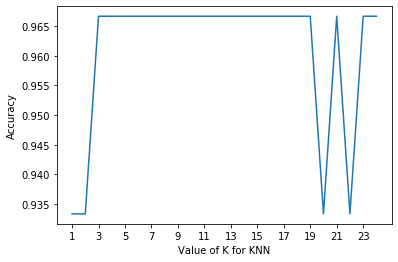

In [4]:
#Visualizing the relationship between k-values and.. 
#..the corresponding testing accuracy
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(ks, score_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.xticks(ticks=np.arange(1,25, 2))

>The plot shows increase in accuracy with the increase in value of k until k=3, after which the accuracy remains constant until k=19. Testing accuracy falls at k=20 and k=22 which is likely due to overfitting.  

# Choosing an optimal k-value of 6, which is between 3 and 19 to retrain the model and make the final prediction. 

In [5]:
#retraining the model
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)

#Predicting the species of the below random observations using our trained model

species = {0:'setosa', 1:'versicolor', 2:'virginica'}
new_data = [[0.3, 1.2, 4.4, 2.3]]
y_prediction = knn.predict(new_data)

scores = metrics.accuracy_score(y_test, y_predict)
print("Predicted species is '", species[y_prediction[0]], "' with accuracy",
      np.round(scores*100, 2), "percent when k=6.")


Predicted species is ' versicolor ' with accuracy 96.67 percent when k=6.
